<a href="https://colab.research.google.com/github/ranjankr22922/ML_Projects/blob/main/YtVideoSummarizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
!pip install transformers

In [30]:
!pip install youtube-transcript-api

In [31]:
from transformers import pipeline
from youtube_transcript_api import YouTubeTranscriptApi

In [32]:
youtube_video = "https://www.youtube.com/watch?v=7IgVGSaQPaw"

In [33]:
video_id = youtube_video.split("=")[1]

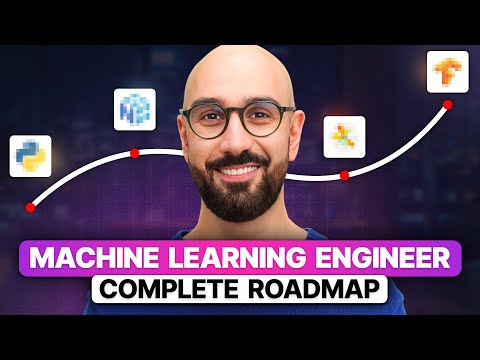

In [34]:
from IPython.display import YouTubeVideo
YouTubeVideo(video_id)

In [35]:
YouTubeTranscriptApi.get_transcript(video_id)

[{'text': 'if you want to become a machine learning',
  'start': 0.08,
  'duration': 3.72},
 {'text': 'engineer there are nine essential skills',
  'start': 1.68,
  'duration': 4.119},
 {'text': "you need to master let's go over them",
  'start': 3.8,
  'duration': 4.36},
 {'text': 'one by', 'start': 5.799, 'duration': 2.361},
 {'text': 'one now machine learning involves',
  'start': 8.24,
  'duration': 4.72},
 {'text': 'creating models that learn from data to',
  'start': 10.519,
  'duration': 4.521},
 {'text': 'make predictions or decisions as a',
  'start': 12.96,
  'duration': 3.92},
 {'text': "machine learning engineer you'll need to",
  'start': 15.04,
  'duration': 3.96},
 {'text': 'master various skills from programming',
  'start': 16.88,
  'duration': 4.319},
 {'text': 'and math to deploying models first up',
  'start': 19.0,
  'duration': 4.039},
 {'text': 'you need to get proficient with python',
  'start': 21.199,
  'duration': 3.281},
 {'text': "it's the primary language 

In [36]:
transcipt = YouTubeTranscriptApi.get_transcript(video_id)

In [37]:
transcipt[:5]

[{'text': 'if you want to become a machine learning',
  'start': 0.08,
  'duration': 3.72},
 {'text': 'engineer there are nine essential skills',
  'start': 1.68,
  'duration': 4.119},
 {'text': "you need to master let's go over them",
  'start': 3.8,
  'duration': 4.36},
 {'text': 'one by', 'start': 5.799, 'duration': 2.361},
 {'text': 'one now machine learning involves',
  'start': 8.24,
  'duration': 4.72}]

In [38]:
result = ""
for i in transcipt:
  result += ' ' + i['text'] + ""

print(len(result))

5862


In [39]:
summarizer = pipeline('summarization')

No model was supplied, defaulted to sshleifer/distilbart-cnn-12-6 and revision a4f8f3e (https://huggingface.co/sshleifer/distilbart-cnn-12-6).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


In [40]:
num_iters = int(len(result)/1000)
summarized_text = []
for i in range(0, num_iters + 1):
  start = 0
  start = i * 1000
  end = (i + 1) * 1000
  out = summarizer(result[start:end], min_length = 5, max_length = 200)
  out = out[0]
  out = out['summary_text']
  summarized_text.append(out)

print(summarized_text)

Your max_length is set to 200, but your input_length is only 195. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=97)
Your max_length is set to 200, but your input_length is only 193. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=96)
Your max_length is set to 200, but your input_length is only 185. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=92)
Your max_length is set to 200, but your input_length is only 189. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=94)


[" Machine learning involves creating models that learn from data to make predictions or decisions . As a machine learning engineer you'll need to master various skills from programming and math to deploying models .", ' Understanding these Concepts will really boost your problem solving skills which is key for tackling complex challenges . One to two weeks of practice is enough to get up and running next you need to dive into data structures and algorithms . Using the right data structures helps you manage large data sets efficiently and keeps your algorithms running smoothly .', " Free supplementary PDF breaks down specific Concepts you need to learn for each skill . It's a great resource to review your progress find gaps in your knowledge and prepare for interviews . Next thing is a solid foundation in mathematics and statistics .", ' Machine learning algorithms fall into two categories supervised and unsupervised . In supervised learning the model learns from labeled data meaning e

In [41]:
str(summarized_text)

'[" Machine learning involves creating models that learn from data to make predictions or decisions . As a machine learning engineer you\'ll need to master various skills from programming and math to deploying models .", \' Understanding these Concepts will really boost your problem solving skills which is key for tackling complex challenges . One to two weeks of practice is enough to get up and running next you need to dive into data structures and algorithms . Using the right data structures helps you manage large data sets efficiently and keeps your algorithms running smoothly .\', " Free supplementary PDF breaks down specific Concepts you need to learn for each skill . It\'s a great resource to review your progress find gaps in your knowledge and prepare for interviews . Next thing is a solid foundation in mathematics and statistics .", \' Machine learning algorithms fall into two categories supervised and unsupervised . In supervised learning the model learns from labeled data mea